In [2]:
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
def load_data():
    """
    Carga el archivo `files/input/shipping-data.csv` y retorna un DataFrame.
    """
    return pd.read_csv('../files/input/shipping-data.csv')

In [18]:
def create_visual_for_shipping_per_warehouse(data):
    """
    Crea un gráfico de barras que muestre la cantidad de envios por cada
    bloque de almacén.
    """
    df = data.copy()
    plt.figure()
    counts = df.Warehouse_block.value_counts()
    counts.plot.bar(
        title='Shipping per Warehouse',
        xlabel='Warehouse block',
        ylabel='Record Count',
        color='tab:blue',
        fontsize=8,
    )

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig('shipping_per_warehouse.png')

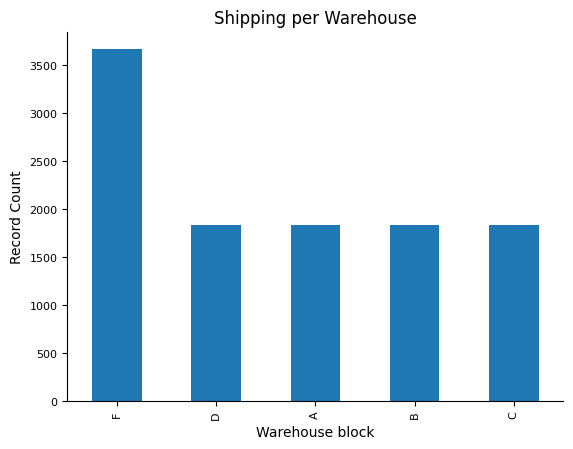

In [19]:
df = load_data()
create_visual_for_shipping_per_warehouse(df)


In [22]:
def create_visual_for_mode_of_shipment(data):
    df = data.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title='Mode of Shipment',
        ylabel='',
        wedgeprops=dict(width=0.35),
        colors=['tab:blue', 'tab:orange', 'tab:green'],
    )
    plt.savefig('mode_of_shipment.png')

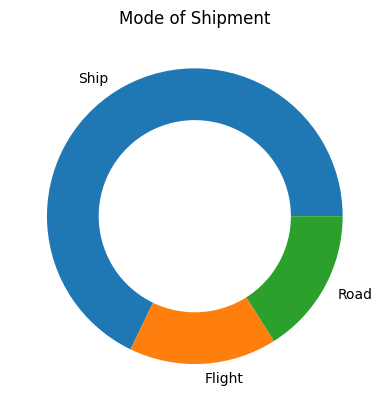

In [23]:
df = load_data()
create_visual_for_mode_of_shipment(df)

In [32]:
def create_visual_for_average_customer_rating(df):
    df = df.copy()
    plt.figure()
    df = (
        df[["Mode_of_Shipment", "Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()
    )
    df.columns = df.columns.droplevel()
    df = df[["mean", "min", "max"]]
    plt.barh(
        y=df.index.values,
        width=df["max"].values - 1,
        left=df["min"].values,
        height=0.9,
        color="lightgray",
        alpha=0.8,
    )

    colors = [
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"].values
    ]
    plt.barh(
        y=df.index.values,
        width=df["mean"].values - 1,
        left=df["min"],
        color=colors,
        height=0.5,
        alpha=1,
    )

    plt.title("Average Customer Rating")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("average_customer_rating.png")


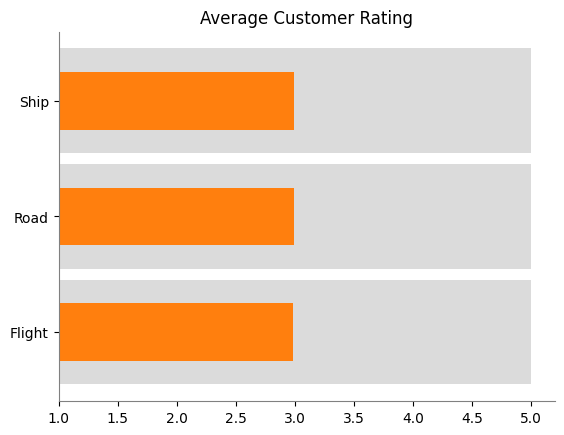

In [33]:
df = load_data()
create_visual_for_average_customer_rating(df)  

In [34]:
def create_visual_for_weight_distribution(data):
    df = data.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title='Shipped Weight Distribution',
        edgecolor='white',
        color='tab:orange',
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig('weight_distribution.png')  

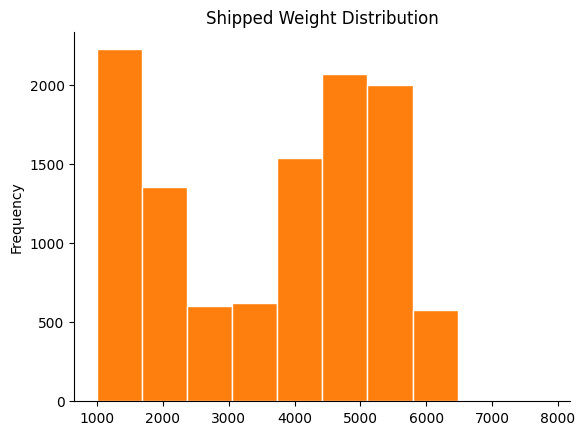

In [35]:
df = load_data()
create_visual_for_weight_distribution(df)  

In [36]:
%%writefile index.html

<!DOCTYPE html>
<html>
<body>
    <h1>Shipping Dashboard Example</h1>
    <div style="width: 45%; float:left">
        <img src="shipping_per_warehouse.png" alt="Fig 1">
        <img src="mode_of_shipment.png" alt="Fig 2">
    </div>
    <div style="width: 45%; float:right">
        <img src="average_customer_rating.png" alt="Fig 3">
        <img src="weight_distribution.png" alt="Fig 4">
    </div>
</body>


Writing index.html
